In [27]:
# Import your dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

In [44]:
# For more info about the data visit:
    # https://fred.stlouisfed.org/series/IPN31152N
    # https://en.wikipedia.org/wiki/Industrial_production_index

# Loading the data into a variable.
frozen_desert_path = "Resources/frozen_desert_IPN31152N.csv"

fd_data = pd.read_csv(frozen_desert_path)

fd_data.head()

,DATE,output,Year
0,1/1/1972,58.8126,1972
1,2/1/1972,65.8899,1972
2,3/1/1972,73.0930,1972
3,4/1/1972,77.1119,1972
4,5/1/1972,83.9479,1972


In [ ]:
# Adding a year column by converting date.
fd_data['Year'] = pd.to_datetime(fd_data['DATE']).dt.year

fd_data.head()

In [45]:
fd_data.describe()

,output,Year
count,558.000000,558.000000
mean,110.070213,1994.752688
std,28.228412,13.436991
min,58.812600,1972.000000
25%,88.685475,1983.000000
50%,107.600050,1995.000000
75%,128.622275,2006.000000
max,195.460600,2018.000000


In [39]:
fd_data['DATE'].dt.year



AttributeError: Can only use .dt accessor with datetimelike values

In [23]:
month_year = fd_data.iloc[:, 0]

month_year.head()

0    1/1/1972
1    2/1/1972
2    3/1/1972
3    4/1/1972
4    5/1/1972
Name: DATE, dtype: object

In [24]:
x_axis = np.arange(0,month_year.count(),1)

# x_axis

In [25]:
output = fd_data.iloc[:, 1]

output.head()

0    58.8126
1    65.8899
2    73.0930
3    77.1119
4    83.9479
Name: output, dtype: float64

In [29]:
(slope, intercept, _, _, _) = linregress(x_axis, output)
fit = slope * x_axis + intercept

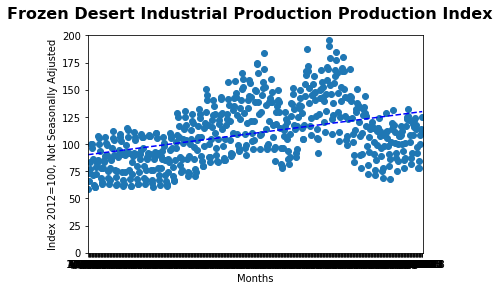

In [31]:
fig, ax = plt.subplots()

fig.suptitle("Frozen Desert Industrial Production Production Index", fontsize=16, fontweight="bold")

ax.set_xlim(0,month_year.count())
ax.set_ylim(0, 200)

ax.set_xlabel("Months")
ax.set_ylabel("Index 2012=100, Not Seasonally Adjusted")

ax.plot(month_year, output, linewidth=0, marker='o')
ax.plot(month_year, fit, 'b--')

plt.show()

In [4]:
# Creating bins for the goals
bins = [0, 1000, 2000, 3000, 4000, 5000, 999999999]

group_names = ["<1k", "2k", "3k", "4k", "5k", "5k+"]

ks_data["Goal Group"] = pd.cut(ks_data["goal"], bins, labels = group_names)

ks_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Goal Group
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,<1k
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,5k+
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,5k+
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,5k
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,5k+


In [5]:
ks_data = ks_data[ks_data["state"] != 'undefined']


In [6]:
ks_data["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [7]:
# Creating bins for the goals
bins = [0, 1000, 2000, 3000, 4000, 5000, 999999999]

group_names = ["<1k", "2k", "3k", "4k", "5k", "5k+"]

ks_data["Goal Group"] = pd.cut(ks_data["goal"], bins, labels = group_names)